# **Submission Tugas Akhir Dicoding**

> Indented block



**Data Diri**

Nama : I Gusti Agung Putu Bagus Satria Wicaksana

Link Profile : https://www.dicoding.com/users/agung_b

Email : satriaagung1111@gmail.com

# Melakukan Import Dataset rockpaperscissors

In [3]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip 

--2021-06-27 03:31:47--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.38MB/s    in 49s     

2021-06-27 03:32:38 (6.23 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



# Mengekstrak Dataset Yang Telah Didownload

In [4]:
#import os dan lihat isi direktori
import os

os.listdir('/content')

['.config', 'rockpaperscissors.zip', 'sample_data']

In [5]:
#extract rockpaperscissors.zip dan taruh di /files
import zipfile

fileName = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(fileName,'r')
zip_ref.extractall('/files')
zip_ref.close()

In [8]:
#lihat kembali isi dari /files tempat kita menaruh file
os.listdir('/files')

#lihat isi file yang di extract
os.listdir('/files/rockpaperscissors')

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rps-cv-images', 'rock']

In [9]:
#melihat banyak file pada masing-masing folder
print(len(os.listdir('/files/rockpaperscissors/scissors')))
print(len(os.listdir('/files/rockpaperscissors/paper')))
print(len(os.listdir('/files/rockpaperscissors/rock')))

750
712
726


# Membagi Data Menjadi Train Set dan Validation Set 

Train Set = 1314 sampel, dan Validation Set = 874 sampel

In [10]:
#membuat path baru untuk Train Set dan Validation Set

asal_dir = '/files/rockpaperscissors'
trainset_dir = os.path.join(asal_dir, 'train')
validationset_dir = os.path.join(asal_dir, 'val')


In [11]:
#membuat direktori untuk trainset_dir dan validationset_dir
os.mkdir(trainset_dir)
os.mkdir(validationset_dir)

In [12]:
#membuat direktori untuk tiap data (scissors, paper, rock)
scissors_dir = os.path.join(asal_dir,'scissors')
paper_dir = os.path.join(asal_dir, 'paper')
rock_dir = os.path.join(asal_dir, 'rock')

In [13]:
#memecah data pada direktori
#masing-masing data akan menggunakan test_size sebanyak 0.4 supaya 40% data dari sampel terpakai untuk test set.

#import sklearn
from sklearn.model_selection import train_test_split

# memecah direktori scissors menjadi data train dan data validation
train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

# memecah direktori paper menjadi data train dan data validation
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

# memecah direktori rock menjadi data train dan data validation
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

In [14]:
#membuat direktori untuk masing-masing data train dan data validation

#membuat direktori untuk data train
train_scissors = os.path.join(trainset_dir, 'scissors')
train_paper = os.path.join(trainset_dir, 'paper')
train_rock = os.path.join(trainset_dir, 'rock')

#membuat direktori untuk data validation
validation_scissors = os.path.join(validationset_dir, 'scissors')
validation_paper = os.path.join(validationset_dir, 'paper')
validation_rock = os.path.join(validationset_dir, 'rock')

In [15]:
#membuat direktori baru untuk masing-masing data train dan data validation yang telah diinisialisasi

os.mkdir(train_scissors)
os.mkdir(train_paper)
os.mkdir(train_rock)

os.mkdir(validation_scissors)
os.mkdir(validation_paper)
os.mkdir(validation_rock)

In [16]:
# mengcopy data train dan data validation ke direktori baru
# mengimport shutil
import shutil

#melakukan copy pada data train
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))

#melakukan copy pada data validation
for i in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(validation_scissors,i))
for i in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(validation_paper,i))
for i in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir,i), os.path.join(validation_rock,i))

In [17]:
#mengecek apakah file data train dan data validation sudah sesuai

#file data train
print(len(os.listdir('/files/rockpaperscissors/train/scissors')))
print(len(os.listdir('/files/rockpaperscissors/train/paper')))
print(len(os.listdir('/files/rockpaperscissors/train/rock')))

450
427
435


Total dari data train diatas adalah 1312

In [18]:
#file data validation
print(len(os.listdir('/files/rockpaperscissors/val/scissors')))
print(len(os.listdir('/files/rockpaperscissors/val/paper')))
print(len(os.listdir('/files/rockpaperscissors/val/rock')))

300
285
291


Total dari data validation diatas adalah 876 yang merupakan 40% dari total sampel

# Melihat Visualisasi Beberapa Gambar

In [58]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image
plt.style.use('seaborn')

In [59]:
#lihat salah satu gambar

#melihat salah satu isi folder disini saya gunakan folder train
os.listdir('/files/rockpaperscissors/train/')

['scissors', 'paper', 'rock']

In [ ]:
#lihat salah satu dari 'scissors', 'paper', 'rock' disini saya ambil contoh scissors
os.listdir('/files/rockpaperscissors/train/scissors')

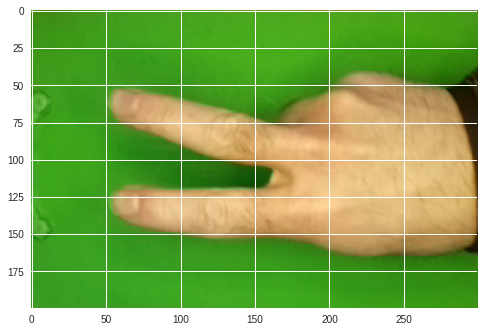

(200, 300, 3)


In [61]:
gambar = plt_image.imread('/files/rockpaperscissors/train/scissors/iXpTSeMxuDfhayJw.png')
plt.imshow(gambar)
plt.show()
print(gambar.shape)

In [ ]:
#kemudian saya coba ambil dari paper
os.listdir('/files/rockpaperscissors/train/paper')

In [ ]:
gambar = plt_image.imread('/files/rockpaperscissors/train/paper/4aWP3XumkgwZtqZ7.png')
plt.imshow(gambar)
plt.show()
print(gambar.shape)

In [65]:
#kemudian saya coba ambil dari rock
os.listdir('/files/rockpaperscissors/train/rock')

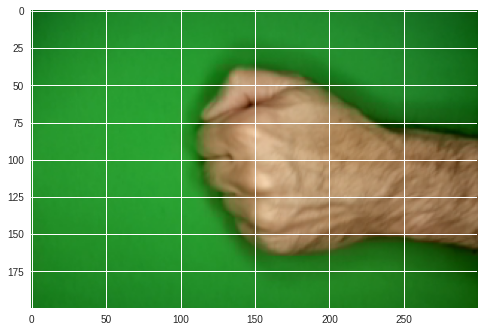

(200, 300, 3)


In [66]:
gambar = plt_image.imread('/files/rockpaperscissors/train/rock/KtMqF92CMvQOIRrO.png')
plt.imshow(gambar)
plt.show()
print(gambar.shape)

Terlihat bahwa ukuran dari gambar pada dataset ini adalah 200 x 300 dengan profil warna RGB

# Melihat Visualisasi Beberapa Gambar Train Set

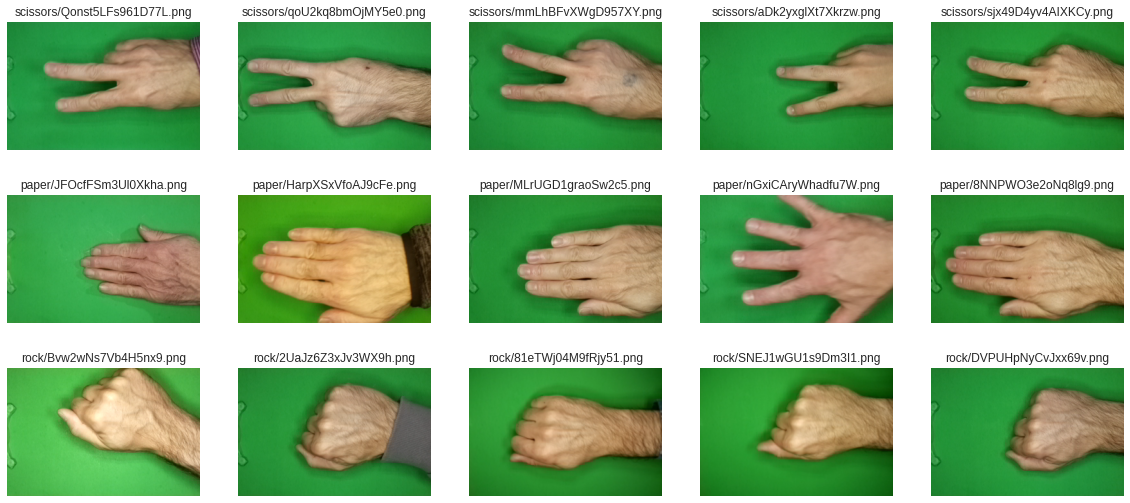

In [67]:
# Total dari visualisasi gambar
total = 5                

# Value random untuk mengambil sampel gambar acak                                                       
index = np.random.randint(20)   

plt.figure(figsize=(4*total, 9))

scissors_list = [os.path.join('/files/rockpaperscissors/train/scissors', name) for name in os.listdir('/files/rockpaperscissors/train/scissors')[index:index+total]]
paper_list = [os.path.join('/files/rockpaperscissors/train/paper', name) for name in os.listdir('/files/rockpaperscissors/train/paper')[index:index+total]]
rock_list = [os.path.join('/files/rockpaperscissors/train/rock', name) for name in os.listdir('/files/rockpaperscissors/train/rock')[index:index+total]]

for i, path in enumerate(scissors_list+paper_list+rock_list):
  plt.subplot(3, total, i+1)
  plt.axis('off')

  plt.title(path.replace('/files/rockpaperscissors/train/', ''))
  img = plt_image.imread(path)
  plt.imshow(img)

Terlihat dataset diatas terdiri dari banyak gambar yang berbeda dari yang besar hinggga yang kecil dan memiliki bentuk beragam dari gunting, batu, kertas

# Augmentasi Gambar

In [32]:
#import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as keras_image

In [71]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=20,
      shear_range=0.1,  
      zoom_range=0.2,   
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/files/rockpaperscissors/train',
    target_size=(100, 150),  
    batch_size= 32,
    class_mode = 'categorical' # karena lebih dari 2 kelas maka menggunakan categorical
)

validation_generator = validation_datagen.flow_from_directory(
    '/files/rockpaperscissors/val',
    target_size=(100, 150),   
    batch_size= 32,
    class_mode = 'categorical' # karena lebih dari 2 kelas maka menggunakan categorical
)


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Membuat Model Sequential

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [75]:
base_model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(100, 150, 3)),
                         MaxPool2D(2, 2),
                         Conv2D(64, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Conv2D(64, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Conv2D(128, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Conv2D(256, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Flatten(),
                         Dropout(0.5),
                         Dense(512, activation='relu'),
                         Dense(3, activation='softmax')])

# model dicompile dengan optimizer ='adam' loss = 'categorical_crossentropy'
base_model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

base_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 21, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 17, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 15, 128)       

# Melakukan Training Model

In [76]:
#melakukan inisialisasi fungsi callback
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("Akurasi Sudah Melebihi 95%\n")
      self.model.stop_training = True

callbacks = callback()

Proses callback akan menghentikan proses training saat sudah melebihi akurasi 95%

In [77]:
hist_model = base_model.fit(
        train_generator,
        epochs=20, 
        steps_per_epoch=int(1312/64),  
        validation_data=validation_generator, 
        validation_steps=int(876/64),
        callbacks=[callbacks],
        verbose=1
      )

Epoch 1/20
20/20 [==============================] - 24s 1s/step - loss: 1.0810 - accuracy: 0.3844 - val_loss: 0.9733 - val_accuracy: 0.3245
Epoch 2/20
20/20 [==============================] - 23s 1s/step - loss: 0.7345 - accuracy: 0.6828 - val_loss: 0.3630 - val_accuracy: 0.8894
Epoch 3/20
20/20 [==============================] - 23s 1s/step - loss: 0.4300 - accuracy: 0.8266 - val_loss: 0.2430 - val_accuracy: 0.9423
Epoch 4/20
20/20 [==============================] - 23s 1s/step - loss: 0.3093 - accuracy: 0.8844 - val_loss: 0.1755 - val_accuracy: 0.9567
Epoch 5/20
20/20 [==============================] - 23s 1s/step - loss: 0.3307 - accuracy: 0.8609 - val_loss: 0.2309 - val_accuracy: 0.9279
Epoch 6/20
20/20 [==============================] - 23s 1s/step - loss: 0.2610 - accuracy: 0.9156 - val_loss: 0.1399 - val_accuracy: 0.9471
Epoch 7/20
20/20 [==============================] - 23s 1s/step - loss: 0.1631 - accuracy: 0.9359 - val_loss: 0.1381 - val_accuracy: 0.9519
Epoch 8/20
20/20 [==

Saat sudah berhasil mencapai akurasi diatas 95%, function callback akan menghentikan proses training model.

# Membuat Visualisasi Model

In [78]:
def plot(hist):
  his = hist.history
  his['epoch'] = hist.epoch

  plt.figure(figsize=(15, 5))

  plt.subplot(121)
  plt.plot(his['epoch'], his['loss'], label='Loss')
  plt.plot(his['epoch'], his['val_loss'], label='Val Loss', color='green')
  plt.legend()

  plt.subplot(122)
  plt.plot(his['epoch'], his['accuracy'], label='Acc')
  plt.plot(his['epoch'], his['val_accuracy'], label='Val Acc', color='green')
  plt.legend()

  return plt.show()

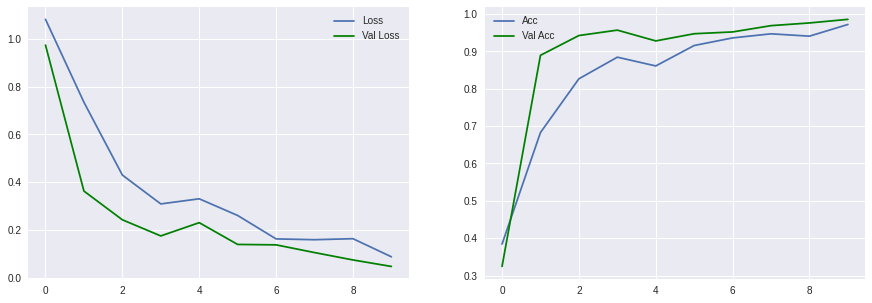

In [79]:
plot(hist_model)

Dari visualisasi model diatas, terlihat pada bagian kiri train loss dan val loss semakin mengecil dan pada bagian kanan akurasinya semakin besar. Dengan akurasi yang diberikan tadi sekitar 95%, maka training model yang dilakukan diatas sudah mampu melakukan prediksi gambar dengan baik

# Melakukan Prediksi Gambar Yang Diunggah ke Google Collab

Saving XCoWpNiWscJm476F.png to XCoWpNiWscJm476F.png
XCoWpNiWscJm476F.png
paper


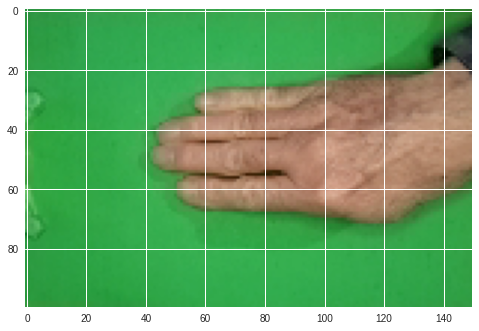

In [94]:
from google.colab import files
from keras.preprocessing import image

tipe = ['paper','rock','scissors']
upload = files.upload()
 
for fn in upload.keys():

  path = fn
  gambar = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(gambar)
  x = image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  hasil = base_model.predict(images, batch_size=64)
  
  print(fn)
  print(tipe[np.argmax(hasil)])